In [31]:
#ライブラリのインポート
import pandas as pd
import seaborn as sns

#データの準備
df = pd.read_csv('/content/temp_data.csv', encoding='shift_jis', header=3)
df

,Unnamed: 0,Unnamed: 1,均質番号
0,2015年1月1日,3.7,1
1,2015年1月2日,2.7,1
2,2015年1月3日,3.8,1
3,2015年1月4日,4.0,1
4,2015年1月5日,6.9,1
...,...,...,...
3952,2025年10月27日,18.0,1
3953,2025年10月28日,16.5,1
3954,2025年10月29日,14.0,1
3955,2025年10月30日,14.3,1


In [32]:
#カラム名を確認
print(df.columns)

Index(['Unnamed: 0', 'Unnamed: 1', '均質番号'], dtype='object')


In [33]:
df = df.rename(columns={
    'Unnamed: 0': 'ds',
    'Unnamed: 1': 'temp',
})

df

,ds,temp,均質番号
0,2015年1月1日,3.7,1
1,2015年1月2日,2.7,1
2,2015年1月3日,3.8,1
3,2015年1月4日,4.0,1
4,2015年1月5日,6.9,1
...,...,...,...
3952,2025年10月27日,18.0,1
3953,2025年10月28日,16.5,1
3954,2025年10月29日,14.0,1
3955,2025年10月30日,14.3,1


In [34]:
# 文字列型に変換して空白を削除
df['ds'] = df['ds'].astype(str).str.strip()
print(df)

# 日付変換
df['ds'] = pd.to_datetime(df['ds'], format='%Y年%m月%d日', errors='coerce')
print(df)

               ds  temp  均質番号
0       2015年1月1日   3.7     1
1       2015年1月2日   2.7     1
2       2015年1月3日   3.8     1
3       2015年1月4日   4.0     1
4       2015年1月5日   6.9     1
...           ...   ...   ...
3952  2025年10月27日  18.0     1
3953  2025年10月28日  16.5     1
3954  2025年10月29日  14.0     1
3955  2025年10月30日  14.3     1
3956  2025年10月31日  14.5     1

[3957 rows x 3 columns]
             ds  temp  均質番号
0    2015-01-01   3.7     1
1    2015-01-02   2.7     1
2    2015-01-03   3.8     1
3    2015-01-04   4.0     1
4    2015-01-05   6.9     1
...         ...   ...   ...
3952 2025-10-27  18.0     1
3953 2025-10-28  16.5     1
3954 2025-10-29  14.0     1
3955 2025-10-30  14.3     1
3956 2025-10-31  14.5     1

[3957 rows x 3 columns]


<Axes: xlabel='ds', ylabel='temp'>

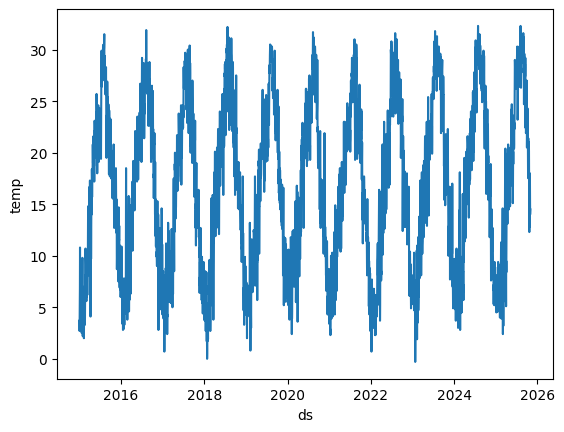

In [35]:
#x・yパラメータには、それぞれの軸に設定する配列を指定
#xパラメータに、to_datetime関数で変換した日付データを指定
time = pd.to_datetime(df['ds'])
sns.lineplot(x=df['ds'], y=df['temp'].squeeze())

In [36]:
#取り込んだデータにおける欠損の有無
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3957 entries, 0 to 3956
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      3957 non-null   datetime64[ns]
 1   temp    3957 non-null   float64       
 2   均質番号    3957 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 92.9 KB


In [37]:
# 日付を datetime に変換
df['ds'] = pd.to_datetime(df['ds'])

# Close 列を y にリネーム
df = df.rename(columns={'temp': 'y'})

In [38]:
#絞り込み

df = df[['ds', 'y']]
df.columns = ['ds','y']
df.head()

,ds,y
0,2015-01-01,3.7
1,2015-01-02,2.7
2,2015-01-03,3.8
3,2015-01-04,4.0
4,2015-01-05,6.9


In [39]:
#予測モデルの学習
#Prophetクラスをインポートし、インスタンス化
from prophet import Prophet
model = Prophet()

In [40]:
#df（過去の時系列データ）を引数に指定して、fitメソッドを実行
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [41]:
#ここから予測
future = model.make_future_dataframe(periods=12, freq='MS')
future

,ds
0,2015-01-01
1,2015-01-02
2,2015-01-03
3,2015-01-04
4,2015-01-05
...,...
3964,2026-06-01
3965,2026-07-01
3966,2026-08-01
3967,2026-09-01


In [42]:
#predictメソッドで予測
forecast = model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01,16.438178,2.550237,9.264409,16.438178,16.438178,-10.356685,-10.356685,-10.356685,-0.070774,-0.070774,-0.070774,-10.285911,-10.285911,-10.285911,0.0,0.0,0.0,6.081493
1,2015-01-02,16.438074,2.843912,9.275768,16.438074,16.438074,-10.476297,-10.476297,-10.476297,-0.111976,-0.111976,-0.111976,-10.364321,-10.364321,-10.364321,0.0,0.0,0.0,5.961777
2,2015-01-03,16.437970,2.713480,9.441658,16.437970,16.437970,-10.471941,-10.471941,-10.471941,-0.032444,-0.032444,-0.032444,-10.439497,-10.439497,-10.439497,0.0,0.0,0.0,5.966029
3,2015-01-04,16.437866,2.896666,9.451342,16.437866,16.437866,-10.432156,-10.432156,-10.432156,0.079018,0.079018,0.079018,-10.511174,-10.511174,-10.511174,0.0,0.0,0.0,6.005711
4,2015-01-05,16.437762,2.903423,9.270087,16.437762,16.437762,-10.470724,-10.470724,-10.470724,0.108366,0.108366,0.108366,-10.579089,-10.579089,-10.579089,0.0,0.0,0.0,5.967039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3964,2026-06-01,17.903735,19.155504,25.368331,17.870265,17.937477,4.477580,4.477580,4.477580,0.108366,0.108366,0.108366,4.369214,4.369214,4.369214,0.0,0.0,0.0,22.381315
3965,2026-07-01,17.917663,22.863575,29.420538,17.878605,17.959305,8.152471,8.152471,8.152471,-0.006902,-0.006902,-0.006902,8.159373,8.159373,8.159373,0.0,0.0,0.0,26.070134
3966,2026-08-01,17.932055,26.365745,32.510961,17.884422,17.980829,11.532316,11.532316,11.532316,-0.032444,-0.032444,-0.032444,11.564760,11.564760,11.564760,0.0,0.0,0.0,29.464371
3967,2026-09-01,17.946447,24.499682,30.777901,17.891459,18.003776,9.731427,9.731427,9.731427,0.034711,0.034711,0.034711,9.696716,9.696716,9.696716,0.0,0.0,0.0,27.677874


In [43]:
#関連する項目を抽出
#日付、旅客数の予測値、不確実性区間を表示
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2015-01-01,6.081493,2.550237,9.264409
1,2015-01-02,5.961777,2.843912,9.275768
2,2015-01-03,5.966029,2.713480,9.441658
3,2015-01-04,6.005711,2.896666,9.451342
4,2015-01-05,5.967039,2.903423,9.270087
...,...,...,...,...
3964,2026-06-01,22.381315,19.155504,25.368331
3965,2026-07-01,26.070134,22.863575,29.420538
3966,2026-08-01,29.464371,26.365745,32.510961
3967,2026-09-01,27.677874,24.499682,30.777901


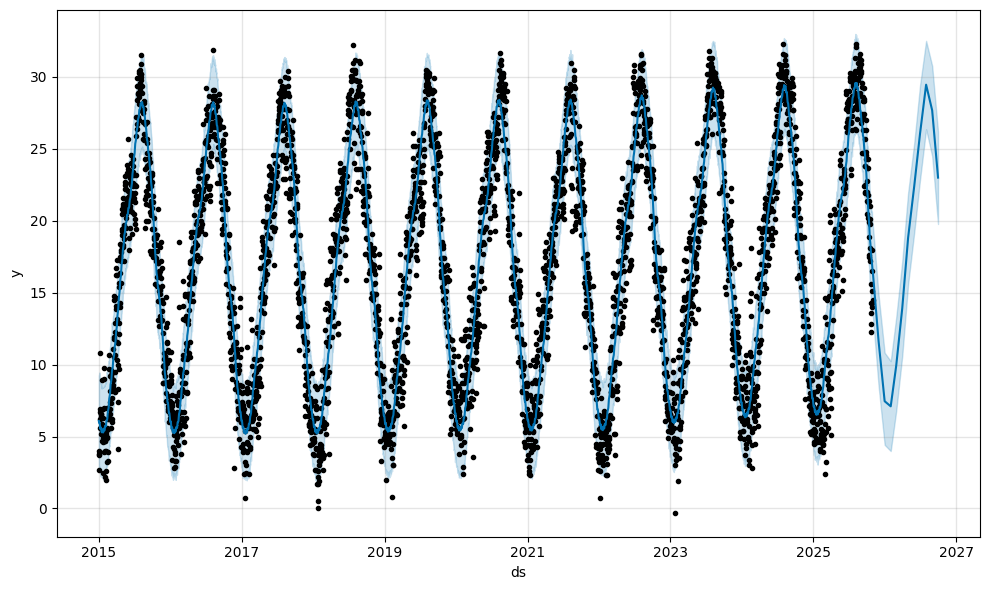

In [44]:
#グラフ上に可視化
fig_forecast = model.plot(forecast)

In [45]:
#予測の評価

#過去のデータを使って、複数パターンのテストを実施
#cutoffsとhorizonという2つのパラメータで調整可能
cutoffs = pd.to_datetime(['2021-12-01', '2022-12-01', '2023-12-01'])

In [46]:
#テストパターンを作成するcross_validation関数をインポート
from prophet.diagnostics import cross_validation

#cross_validation関数を実行して、1年後を作成
df_cv = cross_validation(model, horizon = '365 days', cutoffs=cutoffs)

  0%|          | 0/3 [00:00<?, ?it/s]

In [47]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-12-02,9.984012,6.623937,13.221014,10.1,2021-12-01
1,2021-12-03,9.840657,6.834969,13.124516,9.7,2021-12-01
2,2021-12-04,9.673261,6.527717,12.794062,9.9,2021-12-01
3,2021-12-05,9.614300,6.488901,12.928291,8.6,2021-12-01
4,2021-12-06,9.542336,6.265076,12.659672,8.9,2021-12-01
...,...,...,...,...,...,...
1090,2024-11-26,13.442314,10.359745,16.644264,10.0,2023-12-01
1091,2024-11-27,13.152567,9.919743,16.543688,14.5,2023-12-01
1092,2024-11-28,12.853932,9.781627,16.170144,13.2,2023-12-01
1093,2024-11-29,12.642912,9.509836,15.711608,11.4,2023-12-01


In [48]:
#評価指標を算出するperformance_metrics関数をインポート
from prophet.diagnostics import performance_metrics

#performance_metrics関数を実行
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,4.267493,2.065791,1.576704,0.324898,0.143813,0.220959,0.844037
1,38 days,4.246978,2.060820,1.579820,0.328256,0.147962,0.224005,0.844037
2,39 days,4.252962,2.062271,1.585718,0.330400,0.147962,0.226448,0.844037
3,40 days,4.172575,2.042688,1.558704,0.327365,0.147634,0.224337,0.844037
4,41 days,4.097728,2.024285,1.536591,0.325967,0.147634,0.223182,0.850153


In [49]:
#monthlyパラメータにTrueを指定して、horizon列を月単位で表示?
df_p = performance_metrics(df_cv, monthly=True)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,1,3.606928,1.899191,1.441569,0.499549,0.186582,0.248503,0.877880
1,2,7.430930,2.725973,2.162808,0.473349,0.276237,0.325981,0.762948
2,3,13.090149,3.618031,3.073675,0.363042,0.258934,0.302171,0.574960
3,4,9.776950,3.126812,2.584878,0.193928,0.143292,0.182558,0.636875
4,5,7.223819,2.687716,2.060161,0.122791,0.080946,0.113751,0.793476


<Axes: xlabel='horizon', ylabel='mse'>

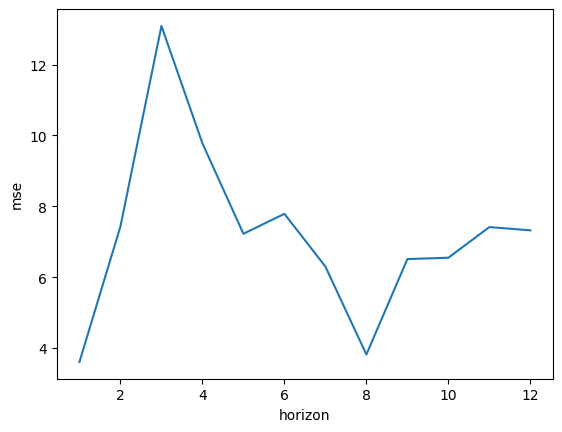

In [50]:
#seabornのlineplot関数を活用して、mseの推移を可視化
sns.lineplot(x='horizon', y='mse', data=df_p)

<Axes: xlabel='horizon', ylabel='coverage'>

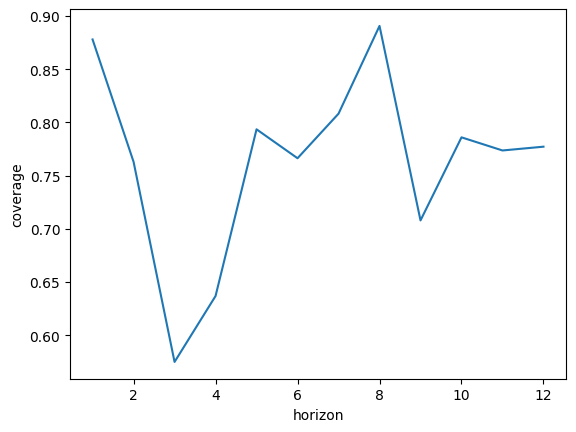

In [51]:
#coverageも、推移を可視化
sns.lineplot(x='horizon', y='coverage', data=df_p)